# Quantum Circuits and Visualisations







In [1]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=bcf9a87d9dd795c11d23b3601a7ed325a81b7c001f2ba053652a1261ce3147aa
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556

In [2]:
from qiskit import *
%matplotlib inline

### Creating a circuit
Let's work on creating our first circuit!

In [3]:
#create a quantum register with 2 qubits
qr = QuantumRegister(2)

#create a classical register with 2 bits
cr = ClassicalRegister(2)

#create a quantum circuit with both registers
qc = QuantumCircuit(qr, cr)

Let's visualise our circuit like we did on the IBM Circuit Composer

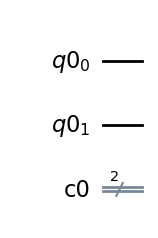

In [4]:
#draw circuit
qc.draw(output = 'mpl')

Hmm... This circuit isn't very interesting. Let's implement a NOT gate on our second qubit $q_1$

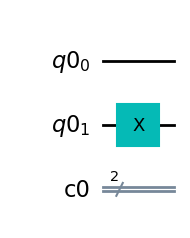

In [5]:
#add an X gate to qubit 1
qc.x(1)
qc.draw('mpl')

Now, let's move onto more quantum gates. Implement a H gate on our first qubit $q_0$

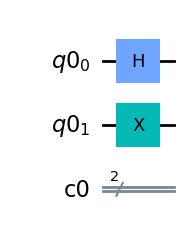

In [6]:
#add a H gate to qubit 0
qc.h(0)
qc.draw('mpl')

Now, add a two-qubit gate: a CX gate on $q_0$ and $q_1$

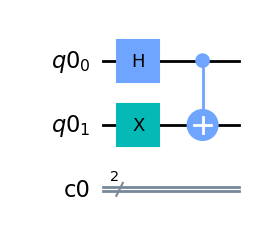

In [7]:
#add a CX gate with control as qubit 0 and target as qubit 1
qc.cx(0,1)
qc.draw('mpl')

Now, we have a circuit that creates entanglement! We next measure out qubits into our classical register

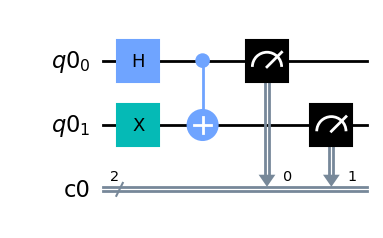

In [8]:
#measure quantum circuit
qc.measure(qr,cr)
qc.draw('mpl')

We're done constructing out circuit!



---


Before we proceed, we can write out our computation in bra-ket notation to see what it does.


> First, we started with an empty circuit: $|0\rangle_0|0\rangle_1$

> Then, we applied X on $q_1$: $|0\rangle_0 (X|0\rangle_1) \\= |0\rangle_0|1\rangle_1$

> Next, we apply H on $q_0$: $(H|0\rangle_0)|1\rangle_1 \\= \frac{1}{\sqrt{2}}(|0\rangle_0 + |1\rangle_0)|1\rangle_1  \\= \frac{1}{\sqrt{2}}|0\rangle_0|1\rangle_1 + \frac{1}{\sqrt{2}}|1\rangle_0|1\rangle_1$

> We apply the CX gate with $q_0$ as control and $q_1$ as target:$\\CX(\frac{1}{\sqrt{2}}|0\rangle_0|1\rangle_1 + \frac{1}{\sqrt{2}}|1\rangle_0|1\rangle_1) \\= \frac{1}{\sqrt{2}}|0\rangle_0|1\rangle_1 + \frac{1}{\sqrt{2}}|1\rangle_0|0\rangle_1$

We have entanglement! If the $q_0$ is measured to be 0, $q_1$ is measured to be 1. If the $q_0$ is measured to be 1, $q_1$ is measured to be 0.

---





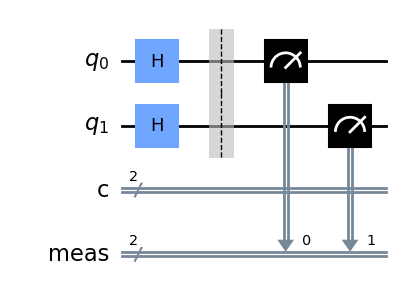

In [20]:
#Ex 1: create circuit entanglement for 1/sqrt(2) (|00> + |11>)

#create a quantum register with 2 qubits
qr2 = QuantumRegister(2)

#create a classical register with 2 bits
cr2 = ClassicalRegister(2)

#create a quantum circuit with both registers
qc2 = QuantumCircuit(qr2, cr2)

qc2 = QuantumCircuit(2,2)

qc2.h(0)
qc2.h(1)
qc2.measure_all()
qc2.draw('mpl')


We now test our circuit on our classical computer (a quantum computing simulator), and then send our code to an actual quantum computer.

First, we select our simulator:

In [21]:
#select qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

Next, we execute our circuit on our simulator.

*  ```experiments``` is used to specify the circuit to be run
*   ```backend``` is used to specify our simulator
*  ```shots``` is used to denote how many times the circuit should be run

In [23]:
#execute circuit and store result
result = execute(experiments = qc, backend = simulator, shots = 1024).result()
result2 = execute(experiments = qc2, backend = simulator, shots = 1024).result()

#get counts from obtained result
counts = result.get_counts()


In [24]:
counts2 = result2.get_counts()

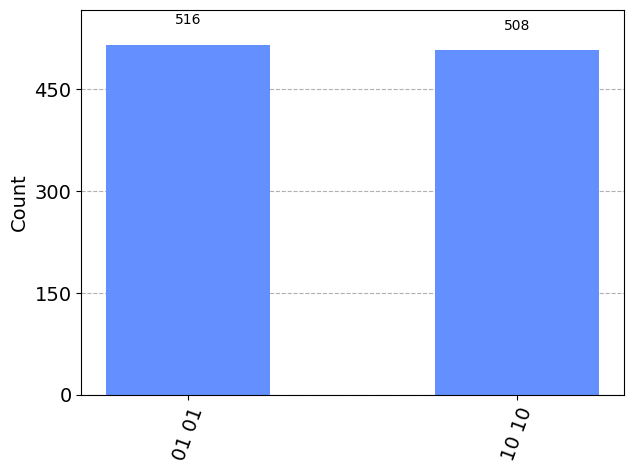

In [25]:
#visualise output obtained
from qiskit.tools.visualization import *
plot_histogram(counts)


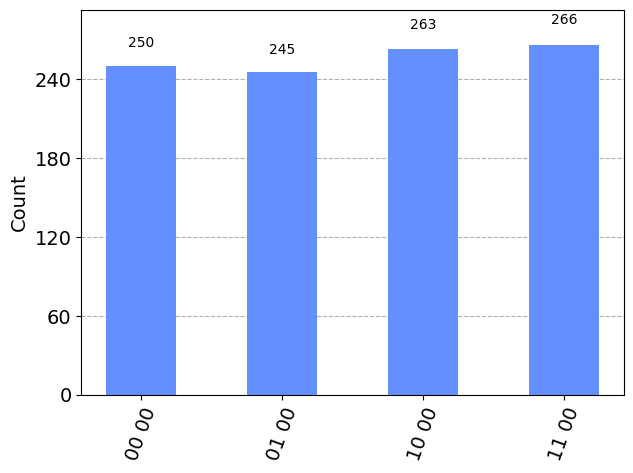

In [26]:
plot_histogram(counts2)

Why do we run the circuit 1024 times? Let's see our result when we run it only once

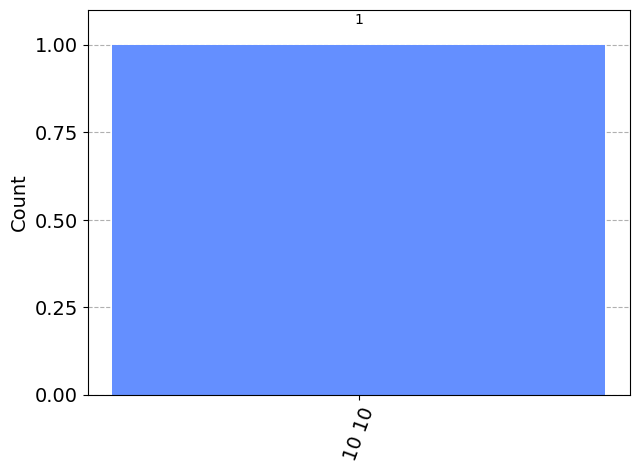

In [27]:
#execute circuit with shots = 1 and store result
result = execute(experiments = qc, backend = simulator, shots = 1).result()

#get counts from obtained result
counts = result.get_counts()

#visualise output obtained
from qiskit.tools.visualization import *
plot_histogram(counts)

Now that our circuit has been tested on a classical simulator, let's run it on a quantum computer.

Set up your IBMQ account and access your API token for your IBMQ account here: https://quantum-computing.ibm.com/account

In [ ]:
#enter your API token within the quotes
IBMQ.save_account('')

In [ ]:
#load account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Let's list the available backends to simulate our quantum circuit

In [ ]:
#select provider
provider = IBMQ.get_provider(hub='ibm-q')

#list available backends
provider.backends()

We can know more details about our actual quantum computers using ```backend_overview```

In [ ]:
#check overview of available quantum computers
from qiskit.tools.monitor import backend_overview
backend_overview()

The least busy is ```ibm_nairobi``` and it has enough qubits to run our circuit on. Let's select it as our backend

In [ ]:
#select ibm_nairobi as the quantum computer
qcomp = provider.get_backend('ibm_nairobi')

Now, it's time to execute it on an actual quantum computer!

In [ ]:
#execute our circuit on the selected quantum backend
job = execute(qc, backend = qcomp)

We can monitor the status of our job

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Once the job is done, it's time to plot our results

In [ ]:
result = job.result()
plot_histogram(result.get_counts(qc))

We see how some results are 00 and 11 - this is due to quantum error


---

Now, let's see how different gates act on different states. We'll use the bloch sphere to understand our results.

First, we apply the I, X, Y and Z gates on |0>


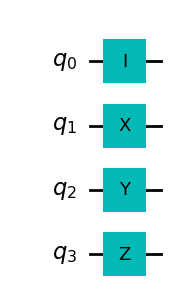

In [30]:
qc1 = QuantumCircuit(4)

# perform gate operations on individual qubits
qc1.i(0)
qc1.x(1)
qc1.y(2)
qc1.z(3)


# Draw circuit
qc1.draw('mpl')

Let's plot our Bloch Spheres to see how they've changed!

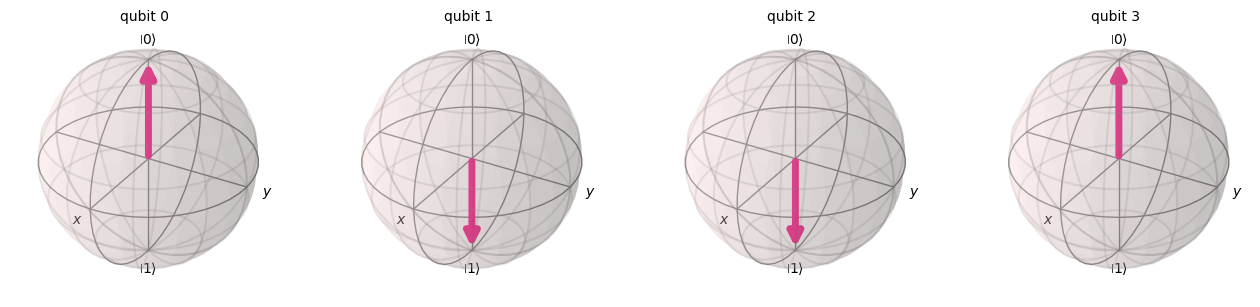

In [31]:
# Plot blochshere
simulator = Aer.get_backend('statevector_simulator')
out1 = execute(qc1,simulator).result().get_statevector()
plot_bloch_multivector(out1)



---


Now, we initialise all our qubits to |1> and then perform our operations

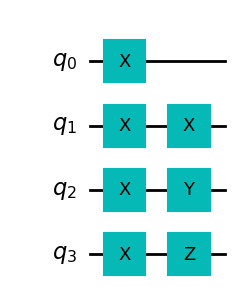

In [33]:
qc2 = QuantumCircuit(4)

# initialize qubits to |1>
qc2.x(range(4))

# perform gate operations on individual qubits
qc2.x(1)
qc2.y(2)
qc2.z(3)

# Draw circuit
qc2.draw('mpl')

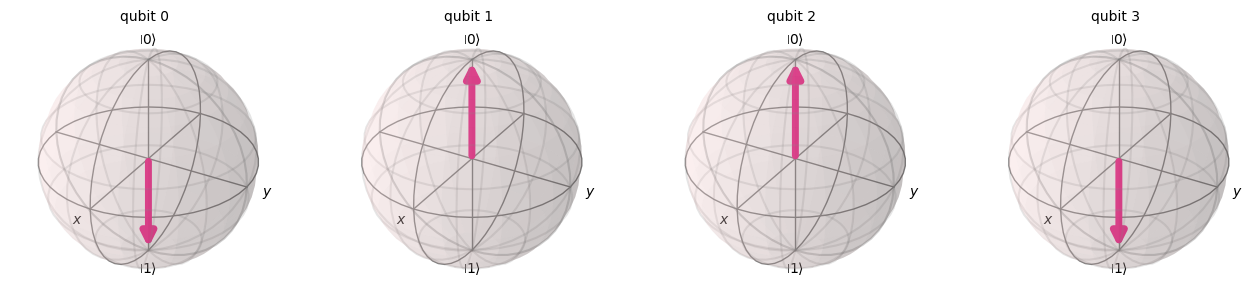

In [34]:
# Plot blochshere
out2 = execute(qc2,simulator).result().get_statevector()
plot_bloch_multivector(out2)



---


Finally, let's try with a different basis state: |+>

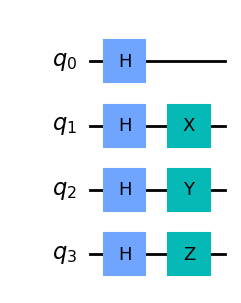

In [35]:
qc3 = QuantumCircuit(4)

# initialize qubits to |1>
qc3.h(range(4))

# perform gate operations on individual qubits
qc3.x(1)
qc3.y(2)
qc3.z(3)

# Draw circuit
qc3.draw('mpl')

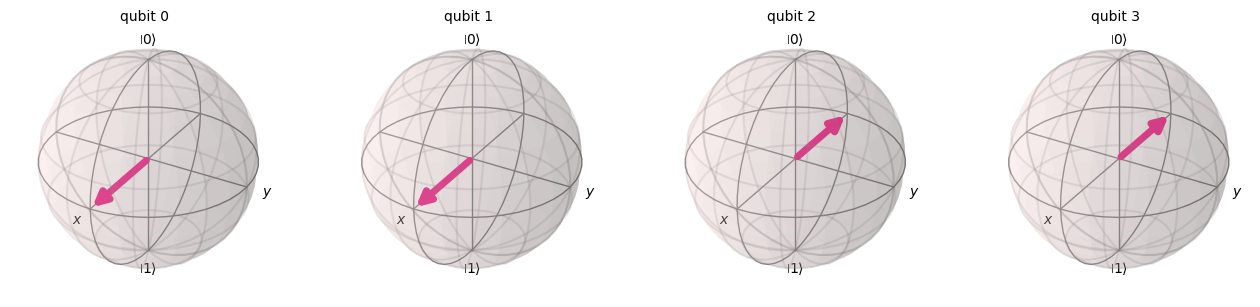

In [36]:
# Plot blochshere
out3 = execute(qc3,simulator).result().get_statevector()
plot_bloch_multivector(out3)



---

Let's finally explore how you can use ```unitary_simulator``` to view the effective matrix after applying your operations

In [37]:
#Constructing HZH gate
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)

sim = Aer.get_backend('unitary_simulator')
array_to_latex(sim.run(qc).result().get_unitary())

<IPython.core.display.Latex object>

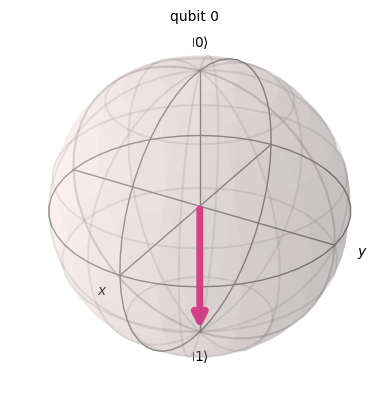

In [38]:
outHZH = execute(qc,simulator).result().get_statevector()
plot_bloch_multivector(outHZH)

In [39]:
array_to_latex(outHZH)

<IPython.core.display.Latex object>